# Monte Carlo Method : State - Value estimation

**공부할 내용**
1. state, action, reward 가 무엇인가요?
2. Return이 무엇인가요?
3. State-Value Function 이란?
4. Action-Value Function 이란?
5. Policy 란?

**사용할 환경 : 자주 만날 Frozen Lake**

![좋은거](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSKrspq5EvLOC2Rv8dfsw1OVqD1WjN5YsmgAHVCVn3x8zLhM5Y8&usqp=CAU)


# 필요 라이브러리 불러오기.

In [1]:
!pip install gym

In [2]:
import numpy as np
import gym

In [3]:
gym.envs.registration.register(
    id="FrozenLake-v3", entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False}
)

# gym.envs.registration.register(
#     id="FrozenLake-v8", entry_point='gym.envs.toy_text:FrozenLakeEnv',
#     kwargs={'map_name': '8x8', 'is_slippery': True}
# )

In [ ]:
env = gym.make('FrozenLake-v3')
# env = gym.make('FrozenLake-v8')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Discrete(16)
action space: Discrete(4)


# 일단, 랜덤하게 진행한 한 번의 Episode를 기록해볼까?!

In [ ]:
states = []
rewards = []

s0 = env.reset()
env.render()
while True :
    a0 = env.action_space.sample()
    s1, r1, done, _ = env.step(a0) # 움직여!

    states.append(s0)
    rewards.append(r1)
    env.render()

    if done == True :
        env.close() # 환경닫기
        break

    s0 = s1


SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


In [ ]:
states

[0, 0, 1, 2, 2, 1, 1, 0, 0, 1]

In [ ]:
rewards

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Return 만들기 연습!

In [ ]:
Returns = [  ]
rewards_sim = [1,2,7,-1,2,-4,5,2,2,-100]
gamma = 0.9

Gt = 0
for reward in rewards_sim[::-1]:
    print(reward)
    #### Your Code Here ####
    Gt = reward + gamma*Gt
    Returns.insert(0, Gt)

print(Returns)

-100
2
2
5
-4
2
-1
7
2
1
[-27.576075680000006, -31.751195200000005, -37.501328, -49.44592, -53.8288, -62.032000000000004, -64.48, -77.2, -88.0, -100.0]


# State 별로 가치를 관찰해보자.

In [ ]:
sim_returns = Returns[:len(states)]

In [ ]:
len(states), len(sim_returns)

(10, 10)

In [ ]:
print(states)
print(sim_returns)

[0, 0, 1, 2, 2, 1, 1, 0, 0, 1]
[-27.576075680000006, -31.751195200000005, -37.501328, -49.44592, -53.8288, -62.032000000000004, -64.48, -77.2, -88.0, -100.0]


# State-Value (V)를 일단 제작해보자.

V[3] 이라고 한다면, 3번 state의 가치가 나와야 한다!

In [ ]:
print(env.observation_space)

Discrete(16)


In [ ]:
V = np.zeros(shape=(16,))
V

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 쉬운 여정

In [ ]:
V_dict = {k:[] for k in range(16)}
V_dict

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: []}

In [ ]:
for idx,state in enumerate(states):
    V_dict[state].append(sim_returns[idx])
V_dict

{0: [-27.576075680000006, -31.751195200000005, -77.2, -88.0],
 1: [-37.501328, -62.032000000000004, -64.48, -100.0],
 2: [-49.44592, -53.8288],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: []}

In [ ]:
for state, values in V_dict.items() :
    if len(values) == 0:
        continue
    V[state] = np.mean(values)
V.reshape([4,4])

array([[-56.13181772, -66.003332  , -51.63736   ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

# 조오금 고급진 여정

In [ ]:
state_n = np.zeros(shape=(16,)) # state 방문 횟수 기록하기 위해
V = np.zeros(shape=(16,))
#state, sim_returns 이용하는 것은 맞다.
for t, state in enumerate(states):
    state_n[state] = state_n[state] + 1
    n_s = state_n[state]
    V[state] = V[state] + (1/n_s)*(sim_returns[t] - V[state])

V.reshape([4,4])

array([[-56.13181772, -66.003332  , -51.63736   ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

## Total 연습!

1. 총 10000번의 episode를 시행한다!
    1. 하나의 episode가 진행 중일 땐,
        * states = [] # state 기록!
        * rewards = [] # reward 기록!
    2. 하나의 episode가 종료되면
        * returns = [] # $G_t$ 제작, 기록!
        * (사실 이 단계에서 $V(s)$를 업데이트 해야 좋음 - episode마다 업데이트가 되니까!)
2. episode가 끝나면
    * state_n : state별 방문횟수 업데이트 하는 넘파이 어레이 제작
    * V : state별 가치값이 저장될 0으로 가득찬 array제작
    * states, state_n, returns 이용하여 V업데이트!

$$V(S_t) = V(S_t) + {1\over{N(S_t)}}(G_t - V(S_t))$$

In [ ]:
####### Your Code Here ##########

states = []
returns = []

gamma = 0.9

for i in range(10000) :
    # 환경을 초기화 하며 초기 state 를 s0에 선언하시오.
    s0 = env.reset()
    rewards = []
    temp_returns = []
    while True :
        # 랜덤한 액션을 하나 선택하여 a0에 담으시오.
        a0 = env.action_space.sample()

        # 환경과 상호작용 하면서, s1, r1, done, _ 를 선언하시오.
        s1, r1, done, _  = env.step( a0 )
        
        # states에 s0을 담고 rewards에 r1을 담으시오.
        states.append(s0)
        rewards.append(r1)

        if done == True :
            env.close() # 환경닫기
            break
        # 다음 단계의 s0에 s1의 값을 옮겨 선언하시오.
        s0 = s1  # 다음단계에선, 지금이 과거닌까

    ### 이 episode에 대해서 Return을 계산하여 temp_returns에 담고
    ### returns = returns + temp_returns
    ### temp_returns.append()아님 주의! insert!
    Gt = 0
    for r in rewards[::-1] : 
        ### Gt 를 업데이트 하는 코드 : Gt <- Rt+1 + gamma * Gt+1
        Gt = r + gamma * Gt
        temp_returns.insert(0, Gt)

    returns = returns + temp_returns

In [ ]:
len(states), len(returns)

(76336, 76336)

In [ ]:
state_n = np.zeros(shape=(16,))
V = np.zeros(shape=(16,))
#state, returns 이용할 것
for t, state in enumerate(states):
    state_n[state] = state_n[state] + 1
    n_s = state_n[state]
   # V 를 업데이트 하는 코드 : v(s) <- v(s) + 1/(n(s)) *  [ Gt - v(s) ]
    V[state] = V[state] + (1/n_s)*(returns[t] - V[state])
V.reshape([4,4])

array([[0.00406505, 0.00387392, 0.00887175, 0.00477207],
       [0.00717146, 0.        , 0.01952671, 0.        ],
       [0.0170613 , 0.05884403, 0.09821869, 0.        ],
       [0.        , 0.14743666, 0.43396956, 0.        ]])

In [ ]:
import matplotlib.pyplot as plt
def plot_values(V):
	# reshape value function
	V_sq = np.reshape(V, (4,4))

	# plot the state-value function
	fig = plt.figure(figsize=(8, 8))
	ax = fig.add_subplot(111)
	im = ax.imshow(V_sq, cmap='cool')
	for (j,i),label in np.ndenumerate(V_sq):
	    ax.text(i, j, np.round(label, 5), ha='center', va='center', fontsize=14)
	plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
	plt.title('State-Value Function')
	plt.show()

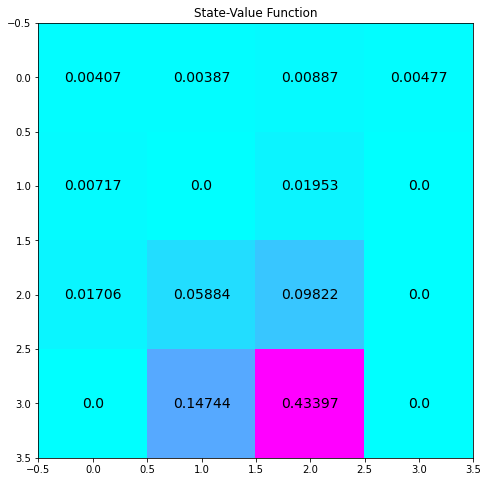

In [ ]:
plot_values(V)

# 자! State-Value 바탕으로 움직인다면?

바꿔 말해, Policy를 제작한다면?

$$\pi'(s) = argmax_{a}(R^a_s + P^a_{ss'}V(s') )$$